### CS 418 EDA LLC Progress Report

#### Introduction

The goal of this project is to analyze the decline of democracy or solidy democracy in a country. Based on different social and political factors, we want to be able to propose classification model to determine how democratic a government is and prediction which democracy the government is likely to follow in the future. Do certain social or political factors have a great impact on the democracy of the government?
Part of the analysis consists of finding any specific trends within the global data, such as in certain regions of the world and what factors they have in common.

#### Any Changes
From the proposal slides, we still aim to create a classification model to get democratic status of different governments based on social and political factors. However we have added 2 more datasets (Poverty Index Data and Literacy Data), in order to train our classification model on different features and analyze it's predictions.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Data cleaning

Datasets:
- Freedom status of countries/territories from 2013-2022
- Multidimensional Poverty Index data
- Literacy data
- Aggregate scores for different measures like Civil Liberties, Political Rights and freedom status from 2016 to 2022
- Election vulnerability data that includes scores for different factors that affect a democratic election for some countries/territories

The listed datatsets were almost close to perfect and required very little cleaning, however the protocol we have followed in order to provide any analysis or classification is:

1. Drop the columns filled with NA's
2. Drop unnamed columns which don't have any data
3. Rename useful column names which are unnamed to that present in the dataset
4. Drop the first row as it has column names for calculations in some nested dataset headers
5. Reset the index of the dataframe for readability
6. Clean missing values by changing them to NAs
7. Extracted needed features to perform Machine Learning

#### Exploratory data analysis: explain what your data looks like (words are fine, but visualizations are often better). Include any interesting issues or preliminary conclusions you have about your data.

In [34]:
df = pd.read_excel('Aggregate_Category_and_Subcategory_Scores_FIW_2003-2022.xlsx', sheet_name = 1, header=0)

In [37]:
data = df.iloc[:, 0:19]
data = data.drop(['Edition','Add Q', 'Add A'], axis = 1)
avg = data.groupby(['Region']).mean()
# avg

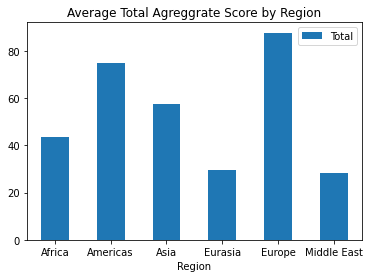

In [24]:
ax = avg.plot.bar(y='Total', rot=0, title="Average Total Agreggrate Score by Region")

It can clearly be seen that the Region with the highest average total agreggation score is Europe. The total agreggation score consists of scores among the following: electoral process, political plurism and participation, functioning of government, freedom of expression and belief, associational and organizational rights, rule of law, and personal autonony and individual rights. It is quite evident that the countries in Eurasia and Middle East have the lowest average total agreggation score.

In [36]:
import electoralVulnerabilityVisualizations as visualizations

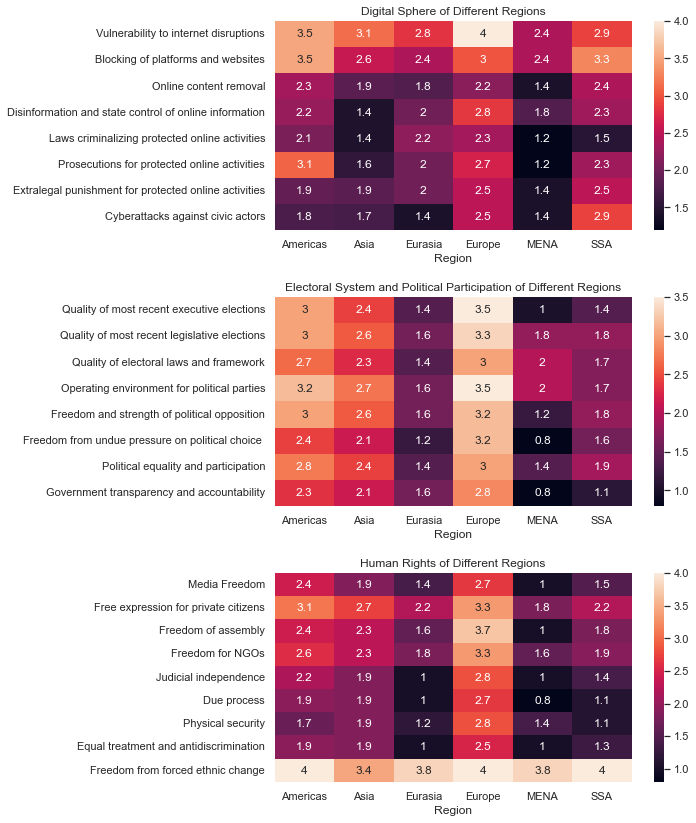

In [33]:
visualizations.plotElectionVulnerability()

Freedom status of countries/territories from 2013-2022 EDA
First visualization shows number of countries/territories in one of the three freedom status by year

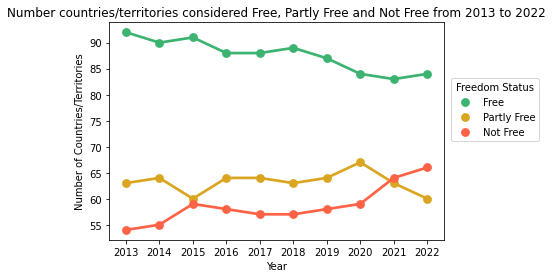

In [5]:
df = pd.read_excel('All_data_FIW_2013-2022.xlsx', sheet_name = 1, header=1)
status_by_year = pd.DataFrame(df.groupby(['Edition','Status']).size())
status_by_year.reset_index(inplace=True)
status_by_year.columns = ['year', 'status', 'count']
ax = sns.pointplot(x="year", y="count", hue="status", hue_order=['F','PF','NF'], data=status_by_year,
                  palette=['mediumseagreen','goldenrod','tomato'])
ax.set(xlabel='Year', ylabel='Number of Countries/Territories',
       title='Number countries/territories considered Free, Partly Free and Not Free from 2013 to 2022')

handlesObj, labels = ax.get_legend_handles_labels()

plt.legend(labels=['Free','Partly Free','Not Free'], handles=handlesObj, loc=7,
           bbox_to_anchor=(1.3, .6), title='Freedom Status')

Potential Hypothesis:
There seems to a potential relationship berween number of partly free and not free countries, this could mean that because partly free countries' institutions are more vulnerable to attacks on democracy and freedom, the flunctuation of not free countries is mostly dependent on partly free countries and how well they are able to solidy their democratic institutions?

#### At least one visualization that tests an interesting hypothesis, along with an explanation about why you thought this was an interesting hypothesis to investigate

From the below EDA a possible hypothesis is that the freeness of a country is dependent on the poverty of the country. Countries with a high poverty rate tend to be not free and thier poor people are intensively deprived of basic needs such as Education, Health and Standard of Living. This shows a clear relationship between the freedom of a country and how deprived the poor people are. There are a few outliers in free countries but the trend suggests that NF and PF countries are most deprived.


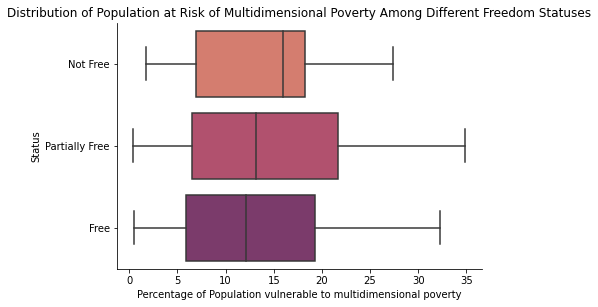

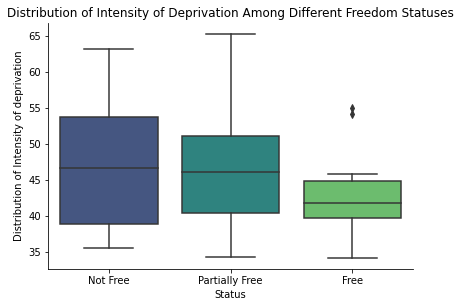

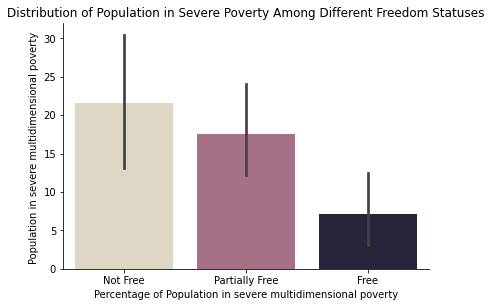

In [2]:
import PovertyEDA as pe
pe.plotEDAvisualizations()

#### At least one ML analysis on your dataset, along with a baseline comparison and an interpretation of the result that you obtain

#### Reflection: a discussion of the following:
 
What is hardest part of the project that you’ve encountered so far?
 
- The hardest part has been combining different datasets to retain features from all the dataset in order to train our classification model using ML.
 
 
What are your initial insights?

 
Are there any concrete results you can show at this point? If not, why not?


 
Going forward, what are the current biggest problems you’re facing?
 
 
Do you think you are on track with your project? If not, what parts do you need to dedicate more time to?
 
 
Given your initial exploration of the data, is it worth proceeding with your project, why? If not, how are you going to   change your project and why do you think it’s better than your current results?
 
 

#### Next steps: What you plan to accomplish in the next month and how you plan to evaluate whether your project achieved the goals you set for it.

Our goal is by the fi